In [131]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To import PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# For calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To get silhouwtte_score
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [132]:
# Reading the file 
country = pd.read_csv(r"H:\UpGrad\Machine Learning 1\Clustering & PCA Assignment\country-data.csv")
# Displaying the first few rows of the file
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [133]:
# Checking the number of rows and column
country.shape

(167, 10)

In [134]:
# Checking the info about the file
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [135]:
# Descibing the file
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [136]:
# Checking for the null values in the file
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- So there is no null values in the file

In [137]:
#Checking for the duplicate rows:
country[country['country'].duplicated()==True]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


- There are no duplicate rows in the dataframe

In [138]:
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [139]:
# separating the country column from the data frame
df1 = country['country']
df1.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [140]:
# Putting the rest of the numerical column into a separate dataframe
df2 = country[country.columns[1:]]
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [141]:
# Scaling the columns
standard_scaler = StandardScaler()
df2_scaled = standard_scaler.fit_transform(df2)
df2_scaled

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [142]:
# Applying the PCA on the dataset
pca = PCA(svd_solver = 'randomized', random_state =42)
# fitting the data
pca.fit(df2_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [143]:
# list of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [144]:
# Checking the variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

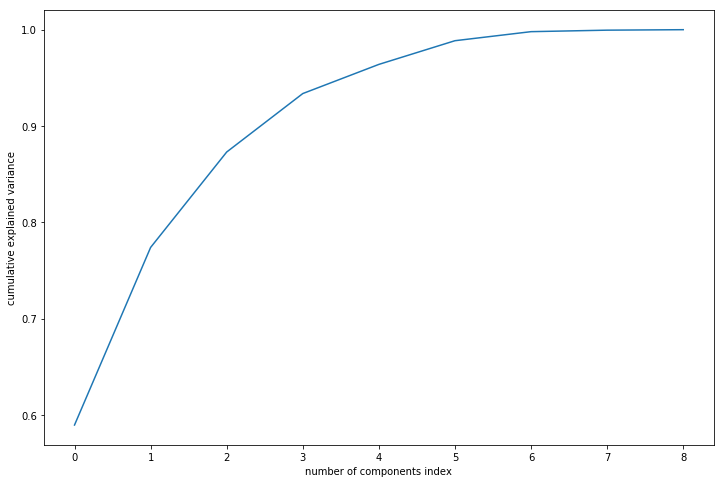

In [145]:
# Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components index')
plt.ylabel('cumulative explained variance')
plt.show()

- As you can see 4 principle components sufficiently explained 93% of the variance.
- Equivantly this means that 4 themes are sufficient in explaining the dtaset.

In [146]:
# Checking how original variables explained the principle components
colnames = list(df2.columns)
pca_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pca_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


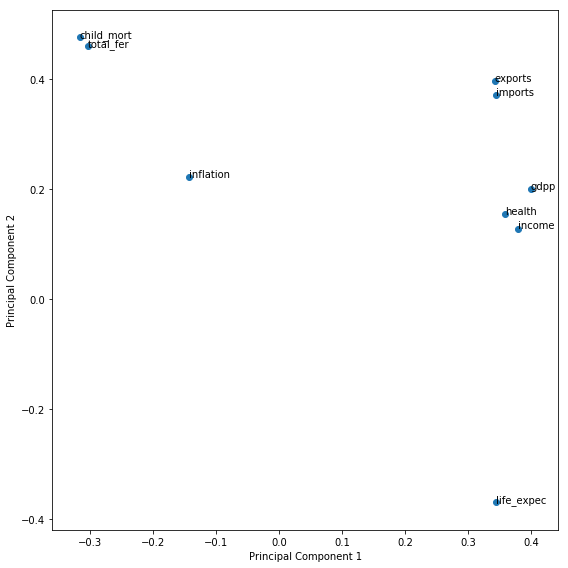

In [147]:
# plot them to visualise these features
fig = plt.figure(figsize=(8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

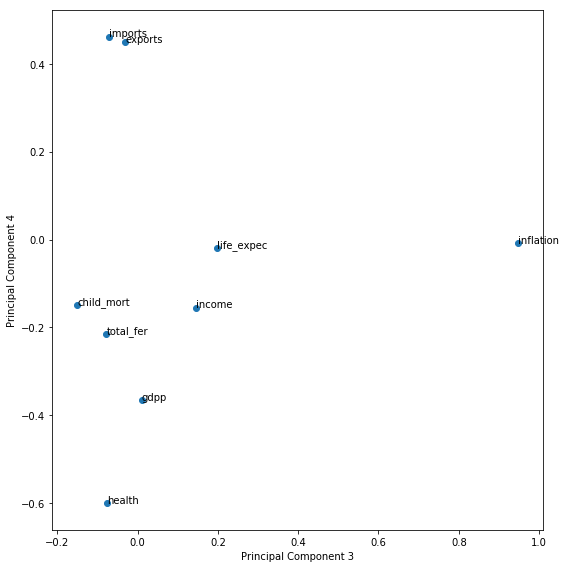

In [148]:
# plot them to visualise these features
fig = plt.figure(figsize=(8,8))
plt.scatter(pca_df.PC3, pca_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC3[i],pca_df.PC4[i]))
plt.tight_layout()
plt.show()

In [149]:
# let's go ahead and do the dimentionality reduction using 4 principle componenets
pca_final = IncrementalPCA(n_components = 4)
df_pca = pca_final.fit_transform(df2_scaled)
df_pca.shape

(167, 4)

In [150]:
df_pca

array([[-2.63664719e+00,  1.47208541e+00, -5.46499687e-01,
         2.37267111e-01],
       [-2.38453563e-02, -1.43581581e+00, -9.07965149e-03,
        -4.42921246e-01],
       [-4.59260048e-01, -6.78793979e-01,  9.67851701e-01,
        -1.76389183e-01],
       [-2.72358099e+00,  2.17601815e+00,  5.97793905e-01,
         4.38918801e-01],
       [ 6.48777079e-01, -1.02649806e+00, -2.44170307e-01,
        -2.67513413e-01],
       [ 3.64467926e-02, -6.84622218e-01,  1.46536060e+00,
         6.60677268e-02],
       [-3.34274149e-01, -1.27903261e+00,  1.90771929e-01,
        -5.01435384e-01],
       [ 3.18436150e+00, -2.38373184e-01, -1.68539991e-01,
         1.66969553e+00],
       [ 3.81813720e+00,  2.62613732e-01, -2.97336122e-01,
         9.74405166e-01],
       [-4.67475427e-01, -4.94060580e-01,  6.08605487e-01,
        -2.58516905e-01],
       [ 1.49957973e+00, -4.25884552e-01, -5.57799928e-01,
         2.24968322e-01],
       [ 1.47129299e+00, -3.25734384e-01,  4.26551347e-01,
      

In [151]:
#Creating tanspose of that so that each coumn is properly arranged
pc = np.transpose(df_pca)

In [152]:
# Creating the dataframe of that
pca_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


{'whiskers': [<matplotlib.lines.Line2D at 0x1893b279f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1893b269908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893b279e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1893b269f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893b269ef0>],
 'means': []}

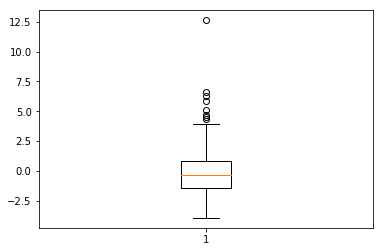

In [153]:
# Outlier analysis for Principle Component 1
# Plotting the box plot for the PC1
plt.boxplot(pca_df2.PC1)

- There are lots of outliers so we will remove them

{'whiskers': [<matplotlib.lines.Line2D at 0x1893d7b57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1893d7b5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893d7b5400>],
 'medians': [<matplotlib.lines.Line2D at 0x1893d7c0550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893d7c0898>],
 'means': []}

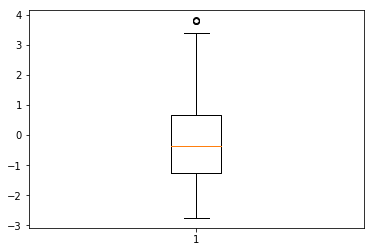

In [154]:
# Removing the outlier
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]
plt.boxplot(pca_df2.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1893d809dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1893d813710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893d809c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1893d813da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893d813e80>],
 'means': []}

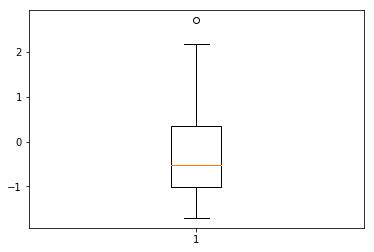

In [155]:
# Outlier analysis for Principle Component 2
# Plotting the box plot for the PC2
plt.boxplot(pca_df2.PC2)

- There isn't much values we don't remove the outliers of this components

{'whiskers': [<matplotlib.lines.Line2D at 0x1893d85bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1893d8666a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893d85bba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1893d866d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893d866e10>],
 'means': []}

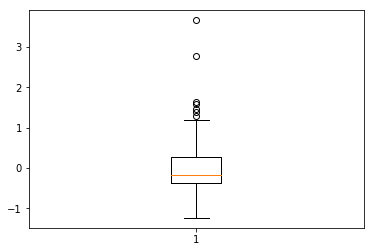

In [156]:
# Outlier analysis for Principle Component 3
# PLotting the box plot for PC3
plt.boxplot(pca_df2.PC3)

- Here we remove the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1893d8b8b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1893d8b8f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893d8b8748>],
 'medians': [<matplotlib.lines.Line2D at 0x1893d8c38d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893d8c3c18>],
 'means': []}

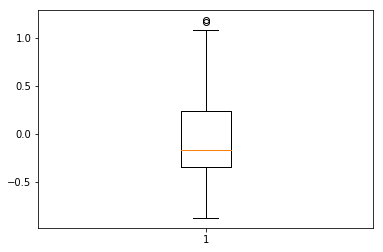

In [157]:
# Removing the outlier
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]
plt.boxplot(pca_df2.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1893f51e470>,
 'caps': [<matplotlib.lines.Line2D at 0x1893f51ea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893f51e048>],
 'medians': [<matplotlib.lines.Line2D at 0x1893f51eeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893f5284a8>],
 'means': []}

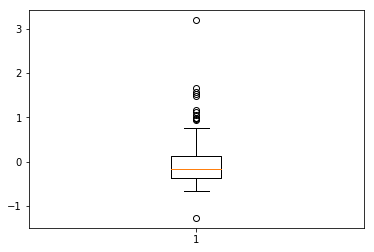

In [158]:
# Outlier analysis for Principle Component 4
# PLotting the box plot for PC4
plt.boxplot(pca_df2.PC4)

- Here we would remove the outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1893f56ee48>,
 'caps': [<matplotlib.lines.Line2D at 0x1893f577780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1893f56ecf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1893f577e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1893f577ef0>],
 'means': []}

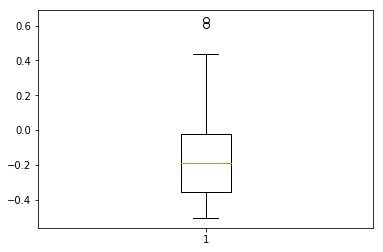

In [159]:
# Removing the outlier
Q1 = pca_df2.PC4.quantile(0.05)
Q3 = pca_df2.PC4.quantile(0.90)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC4 >= Q1) & (pca_df2.PC4 <= Q3)]
plt.boxplot(pca_df2.PC4)

In [160]:
# shape of the data frame
pca_df2.shape

(112, 4)

In [161]:
# Checking for the null value
pca_df2.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
dtype: int64

- # Clustering

In [162]:
# Calculating hopkin'ss statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [163]:
#Let's check the Hopkins measure
hopkins(pca_df2)

0.7532127219135009

- Since hopkins statistic is > 0.5, the given dataset has a good tendency to form the clusters.

- # K-Means Clustering

In [164]:
df3 = pca_df2.copy()

In [165]:
# let's calculate the k-means cluster with random k = 4
k_model1 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
k_model1.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [166]:
#Checking the labels
k_model1.labels_

array([2, 1, 1, 2, 1, 1, 0, 3, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 3,
       1, 0, 2, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1,
       0, 0, 1, 3, 3, 0, 0, 3, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 3, 1, 0, 0,
       2, 2])

In [167]:
#assigning the labels
df4 = pca_df2.copy()
df4['cluster_id'] = k_model1.labels_
df4.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-2.636647,1.472085,-0.546500,0.237267,2
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,2
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [168]:
# value count
df4['cluster_id'].value_counts()

1    46
0    32
2    22
3    12
Name: cluster_id, dtype: int64

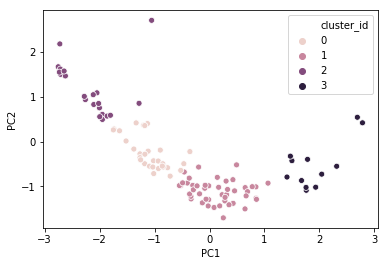

In [169]:
# PLotting the PC1 and PC2 to see the pattern
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df4)

In [170]:
# Calculating the silhouette score to find the optimum number of clusters
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df3,cluster_labels)
    print("For n_clusters = {0}, the silhouette score = {1}".format(num_cluster,silhouette_avg))

For n_clusters = 2, the silhouette score = 0.47163722882441445
For n_clusters = 3, the silhouette score = 0.4126351587442703
For n_clusters = 4, the silhouette score = 0.39883658619749834
For n_clusters = 5, the silhouette score = 0.3499627812948559
For n_clusters = 6, the silhouette score = 0.37199487326091335
For n_clusters = 7, the silhouette score = 0.36506557370012027
For n_clusters = 8, the silhouette score = 0.378654063594469


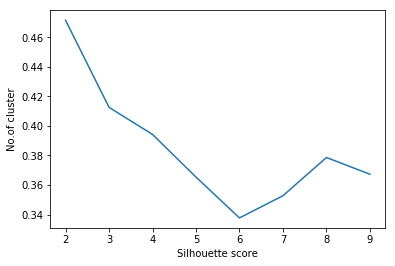

In [212]:
# plotting the silhoutte score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    sse_.append([k, silhouette_score(df3, kmeans.labels_)])
plt.xlabel('Silhouette score')
plt.ylabel('No.of cluster')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

- From silhouette score method, optimum number of cluster = 2

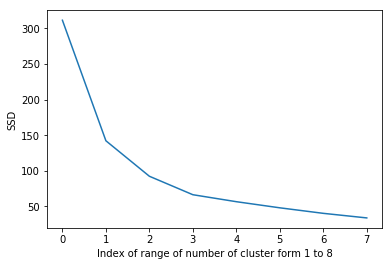

In [213]:
# Plotting the elbow curve to find optimum number of clusters
ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter = 50).fit(df3)
    ssd.append(kmeans.inertia_)
plt.xlabel('Index of range of number of cluster form 1 to 8')
plt.ylabel('SSD')
plt.plot(ssd)

- From elbo curve method optimum number of cluster = 2

In [173]:
# Let's perform kmeans with k = 2
k_model = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
k_model.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [174]:
#Checking the labels
k_model.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0])

In [175]:
#assigning the labels
df5 = pca_df2.copy()
df5['cluster_id'] = k_model.labels_
df5.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [176]:
# value count
df5['cluster_id'].value_counts()

1    74
0    38
Name: cluster_id, dtype: int64

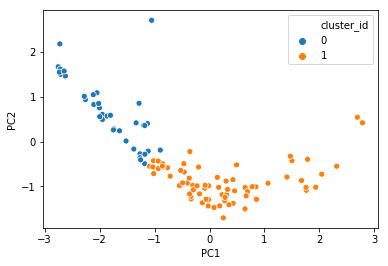

In [177]:
# PLotting the PC1 and PC2 to see the pattern
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df5)

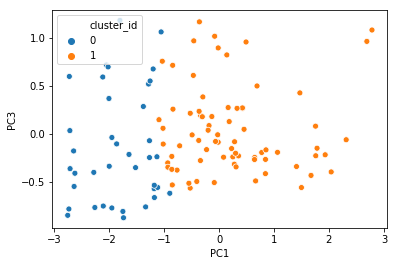

In [217]:
# PLotting the PC1 and PC3 to see the pattern
sns.scatterplot(x='PC1',y='PC3',hue='cluster_id',legend='full',data=df5)

In [178]:
# Merging the original dataset with this one.
df6=pd.merge(country,df5, left_index=True,right_index=True)
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1


In [179]:
# Dropping the cloumns containing the Principle Components
df6=df6.drop(['PC1','PC2','PC3','PC4'],axis=1)
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


- # Hierarachical Clustering

In [180]:
df7 = pca_df2.copy()

In [181]:
df7.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


- Single Linkage

In [182]:
# Making a hierarachical clustering
mergings1 = linkage(df7,method = 'single',metric = 'euclidean')

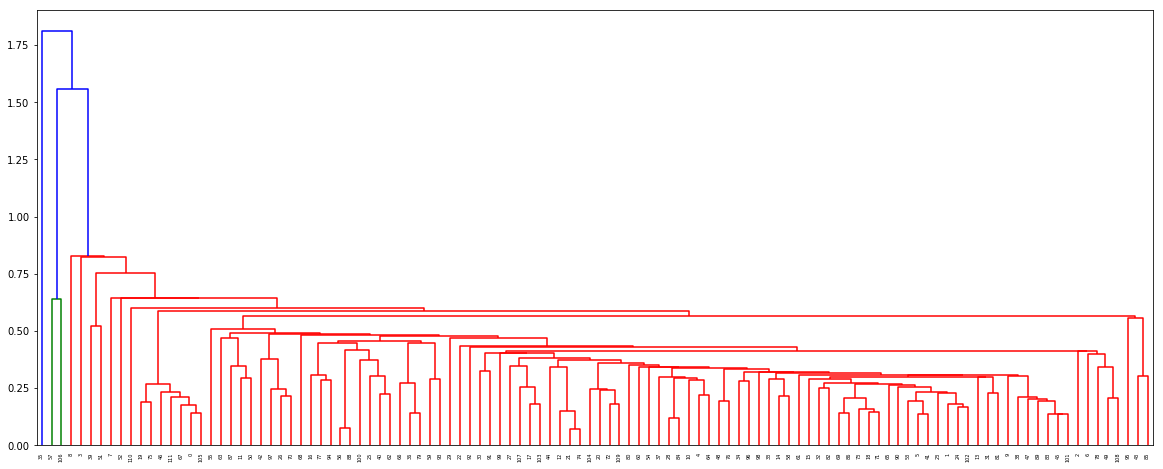

In [183]:
# plotting the dendrogram
plt.figure(figsize=(20,8))
dendrogram(mergings1)
plt.show()

- Complete Linkage

In [184]:
# Making a hierarachical clustering
mergings2 = linkage(df7,method = 'complete',metric = 'euclidean')

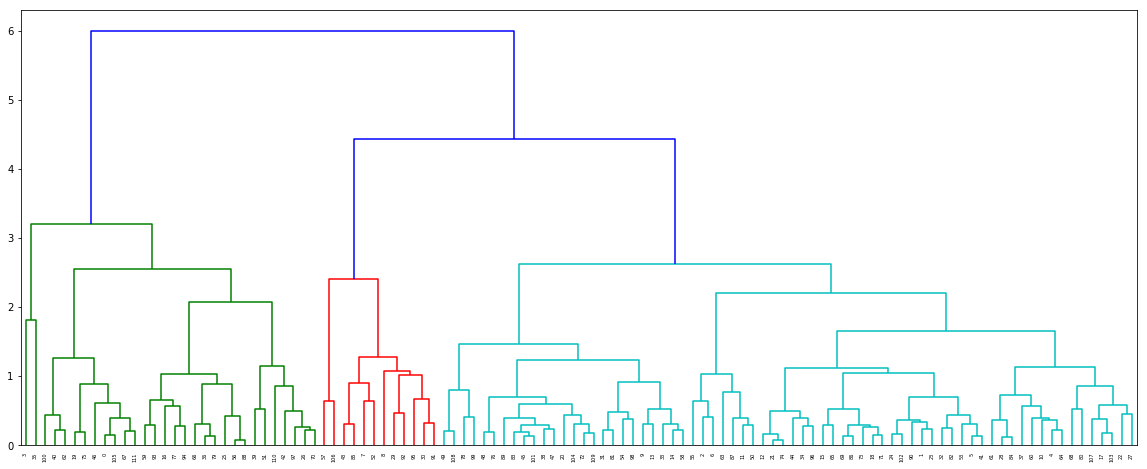

In [185]:
# plotting the dendrogram
plt.figure(figsize=(20,8))
dendrogram(mergings2)
plt.show()

- Complete linkage is much better than single linkage
- From both the linkage graph its clear to have 3 clusters

In [186]:
# clustering with 3 clusters
cluster_labels = cut_tree(mergings2,n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 0])

In [187]:
#assigning the cluster labels
df7['cluster_labels']=cluster_labels
df7.head()

,PC1,PC2,PC3,PC4,cluster_labels
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [188]:
# value count
df7['cluster_labels'].value_counts()

1    70
0    30
2    12
Name: cluster_labels, dtype: int64

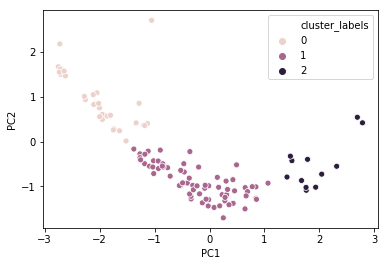

In [189]:
# PLotting the PC1 and PC2 to see the pattern
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',legend='full',data=df7)

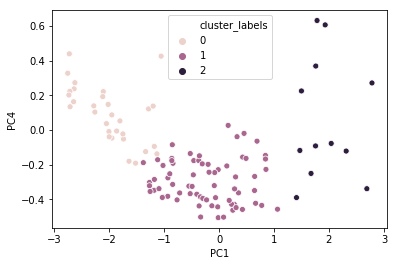

In [219]:
# PLotting the PC1 and PC3 to see the pattern
sns.scatterplot(x='PC1',y='PC4',hue='cluster_labels',legend='full',data=df7)

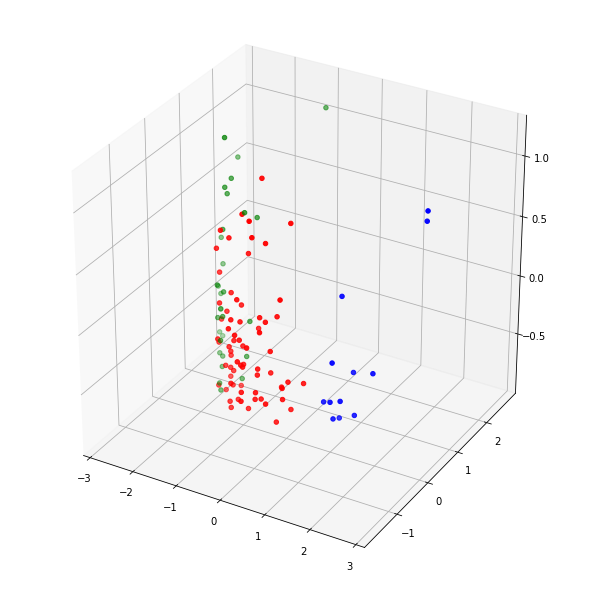

In [220]:
# Plotting PC1, PC2 and PC3 to see the pattern
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df7['PC1'], df7['PC2'], df7['PC3'], c=df7['cluster_labels'].map({0:'green',1:'red',2:'blue'}))

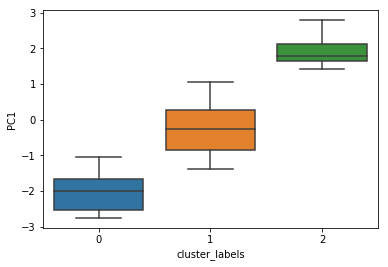

In [191]:
# plot
sns.boxplot(x='cluster_labels', y='PC1', data=df7)

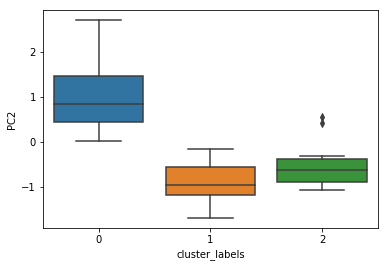

In [192]:
# plot
sns.boxplot(x='cluster_labels', y='PC2', data=df7)

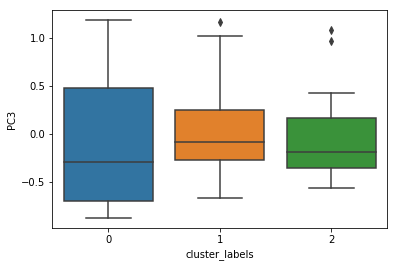

In [193]:
# plot
sns.boxplot(x='cluster_labels', y='PC3', data=df7)

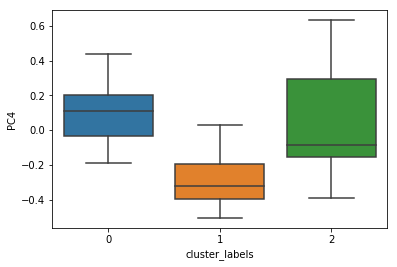

In [194]:
# plot
sns.boxplot(x='cluster_labels', y='PC4', data=df7)

In [195]:
# Merging the original dataset with this one.
df8=pd.merge(country,df7, left_index=True,right_index=True)
df8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1


In [196]:
# Dropping the cloumns containing the Principle Components
df9=df8.drop(['PC1','PC2','PC3','PC4'],axis=1)
df9.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


- # Analysis of the cluster

- Here we got cluster formed by K-Means method having 2 cluster and Hierarchical cluster method having 3 cluster.
- We select Clusters formed by Hierarchical method and proceed.


In [197]:
# Separating the columns whihc will be analysed in a separate dataframe
df10 = df9[['country','gdpp','child_mort','income','cluster_labels']]
df10.head()

,country,gdpp,child_mort,income,cluster_labels
0,Afghanistan,553,90.2,1610,0
1,Albania,4090,16.6,9930,1
2,Algeria,4460,27.3,12900,1
3,Angola,3530,119.0,5900,0
4,Antigua and Barbuda,12200,10.3,19100,1


In [198]:
# grouping all the numeical columns with respect to cluster_labels and getting theor means
clu_gdpp = pd.DataFrame(df10.groupby(["cluster_labels"]).gdpp.mean())
clu_child_mort = pd.DataFrame(df10.groupby(["cluster_labels"]).child_mort.mean())
clu_income = pd.DataFrame(df10.groupby(["cluster_labels"]).income.mean())

In [199]:
#making the dataframe of the average values of each numerical cloumn with the each cluster labels
df11 = pd.concat([pd.Series([0,1,2]),clu_gdpp,clu_child_mort,clu_income], axis=1)
df11.columns = ["cluster_labels","gdpp","child_mort","income"]
df11

,cluster_labels,gdpp,child_mort,income
0,0,2456.800000,76.820000,5147.266667
1,1,5897.457143,23.088571,11348.571429
2,2,26241.666667,6.291667,35733.333333


- Here you could easly see that the cluster '0' contains the countries having low gdpp, low income and very high child_mort.
- Cluster labels = 0 are the countries which are underdeveloped.
- Cluster labels = 1 are the countries which are developing.
- Cluster lebels = 2 are the countries which are developed.


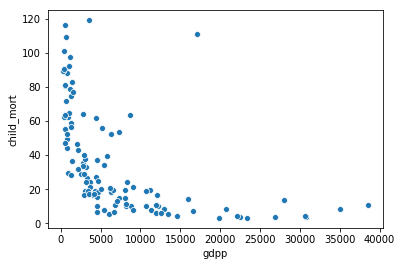

In [200]:
#PLotting the gdpp with child_mort
sns.scatterplot(x='gdpp',y='child_mort',data=df10)

- Here you could see that the countries having high child_mort are also have very low gdpp.
- Countries having high gdpp has a very low child_mort.

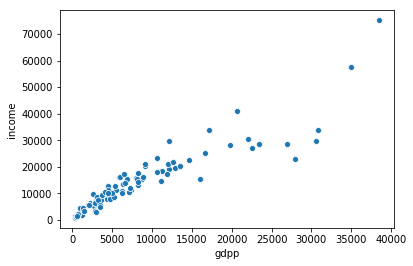

In [201]:
#PLotting the gdpp with income
sns.scatterplot(x='gdpp',y='income',data=df10)

- Here you could see that the countries gdpp is directly proportional to the average income of the people of that country.

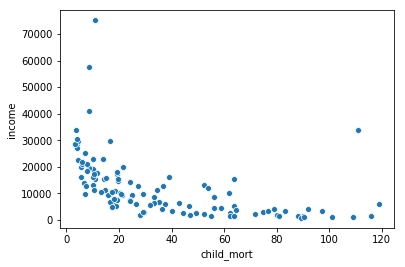

In [202]:
#PLotting the child_mort with income
sns.scatterplot(x='child_mort',y='income',data=df10)

- Here you could see that countries having high child mortality is also the country where people's average income is low.
- Country where people's averge income is large the child mortality is also low. 

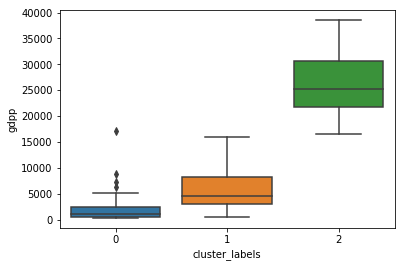

In [203]:
# plotting the box plot of gdpp for each cluster
sns.boxplot(x='cluster_labels', y='gdpp', data=df10)

- Here you could easily see that for underdeveloped countries the gdpp id very low compare to the developing countries.

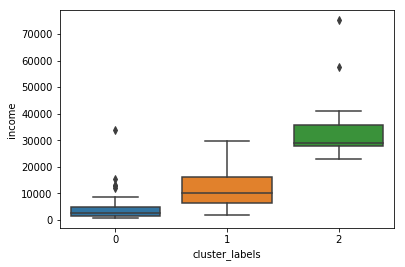

In [204]:
# plotting the box plot of income with each cluster
sns.boxplot(x='cluster_labels', y='income', data=df10)

- Here you could see that the income follow somewhat simmilar pattern to that of gdpp graph.

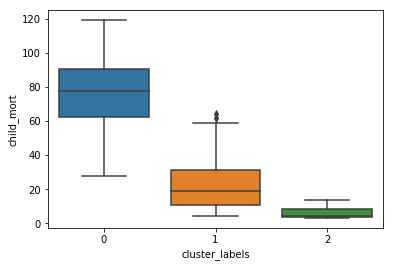

In [205]:
# plotting the boxplot of child_mort for each cluster
sns.boxplot(x='cluster_labels', y='child_mort', data=df10)

- Here you could see that the child mortalility is very high in the underdeveloped countries.

In [206]:
# Separating the underdeveloped countries into a seprate dataframe
df12 = df10.loc[df10['cluster_labels']==0]
df12.head()

,country,gdpp,child_mort,income,cluster_labels
0,Afghanistan,553,90.2,1610,0
3,Angola,3530,119.0,5900,0
21,Botswana,6350,52.5,13300,0
25,Burkina Faso,575,116.0,1430,0
36,Comoros,769,88.2,1410,0


In [207]:
# Sortting the dataframe in ascending order with respect to gdpp
df12.sort_values(by='gdpp')

,country,gdpp,child_mort,income,cluster_labels
88,Liberia,327,89.3,700,0
93,Madagascar,413,62.2,1390,0
106,Mozambique,419,101.0,918,0
94,Malawi,459,90.5,1030,0
50,Eritrea,482,55.2,1420,0
0,Afghanistan,553,90.2,1610,0
56,Gambia,562,80.3,1660,0
126,Rwanda,563,63.6,1350,0
25,Burkina Faso,575,116.0,1430,0
155,Uganda,595,81.0,1540,0


In [208]:
# Sortting the dataframe in ascending order with respect to the income
df12.sort_values(by='income')

,country,gdpp,child_mort,income,cluster_labels
88,Liberia,327,89.3,700,0
106,Mozambique,419,101.0,918,0
94,Malawi,459,90.5,1030,0
63,Guinea,648,109.0,1190,0
126,Rwanda,563,63.6,1350,0
93,Madagascar,413,62.2,1390,0
36,Comoros,769,88.2,1410,0
50,Eritrea,482,55.2,1420,0
25,Burkina Faso,575,116.0,1430,0
155,Uganda,595,81.0,1540,0


In [209]:
# Sortting the daataframe in descending order with respect to the child_mort
df12.sort_values(by='child_mort',ascending = False)

,country,gdpp,child_mort,income,cluster_labels
3,Angola,3530,119.0,5900,0
25,Burkina Faso,575,116.0,1430,0
49,Equatorial Guinea,17100,111.0,33700,0
63,Guinea,648,109.0,1190,0
106,Mozambique,419,101.0,918,0
99,Mauritania,1200,97.4,3320,0
116,Pakistan,1040,92.1,4280,0
94,Malawi,459,90.5,1030,0
0,Afghanistan,553,90.2,1610,0
88,Liberia,327,89.3,700,0


- Taking account all the above 3 data frame we get the countries that need most attention are:
  - liberia
  - Mozambique
  - Malawi
  - Afghanistan
  - Burkina Faso
  - Guinea
  - Uganda 